часть 1

In [ ]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:

def randomSet():
  # random.seed(0)
  np.random.seed(0)
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)
  # torch.backends.cudnn.deterministic = True

In [ ]:
# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:

# Для воспроизводимости результатов обучения нейронной сети
randomSet()

In [ ]:

# В данной лабораторной работе вам необходимо обучить две сети с архитектурой,
# которую вам необходимо разработать самостоятельно.
# В этой части предлагается реализовать полносвязную сеть без использования сверточных слоев.
# Поэкспериментируйте с использованием слоев пакетной нормализации и дропаута.
# Сравните точность на тестовой выборке с аналогичными результатами одногруппников.
class FCNet(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        print(input_size)
        self.fc1 = nn.Linear(input_size, 512)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1024)
        self.act2 = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.6)
        self.fc3 = nn.Linear(1024, 128)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.act3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 32)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.act4 = nn.ReLU()
        self.fc5 = nn.Linear(32, output_size)

    def forward(self, x):
        # x = torch.flatten(x, start_dim=3)
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        # x = self.dropout(x)
        x = self.act3(self.batchnorm1(self.fc3(x)))
        x = self.act4(self.batchnorm2(self.fc4(x)))
        x = self.fc5(x)

        return x

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 15
BATCH_SIZE = 256

In [ ]:
# Второй шаг используется для нормализации данных путем указания среднего значения и
# стандартного отклонения для каждого из трех каналов
# Это преобразует данные из [0,1] в [-1,1]

# Нормализация данных должна помочь ускорить преобразование и уменьшить вероятность
# исчезновения градиентов с определенными функциями активации
transform_ = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/train', train=True, download=True, transform=transform_)
test_data = datasets.CIFAR10(root='./data/test', train=False, download=True, transform=transform_)

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Готовимся к обучению
model = FCNet().to(device)  # создаем модель
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

3072


In [ ]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        batch = batch.reshape(batch.shape[0], -1).to(device)
        loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
        # ВАШ КОД ЗДЕСЬ
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels.to(device))
        loss.backward()
        optimizer.step()
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.595023512840271
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 1.5869543552398682
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 1.5406869649887085
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 1.4428069591522217
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 1.2101470232009888
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 1.1190669536590576
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 1.0186036825180054
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 1.164160132408142
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.8751449584960938
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.9179254770278931
Эпоха 11 завершилась с функцией стоимости на последнем пакете = 0.6740744709968567
Эпоха 12 завершилась с функцией стоимости на последнем пакете = 0.3376902937889099
Эпоха 13 заверш

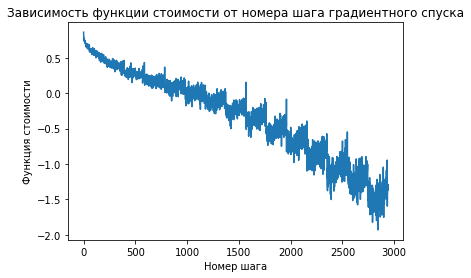

In [ ]:
# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()
     

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.to(device)
    train_features = train_features.reshape(train_features.shape[0], -1).to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.to(device)
    test_features = test_features.reshape(test_features.shape[0], -1).to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions))

Точность (accuracy) на обучающей выборке: 0.95168
Точность (accuracy) на тестовой выборке: 0.5523


часть 2


In [ ]:
from tqdm import tqdm

# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
class FCNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(3*32*32, 500)
        self.fc2 = nn.Linear(500, 200)
        self.fc3 = nn.Linear(200, 80)
        self.fc4 = nn.Linear(80, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout()
        self.bn = nn.BatchNorm1d(500)
        # self.bn = nn.BatchNorm1d()

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.bn(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 20
BATCH_SIZE = 256

# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/cifar/train', train=True, download=True, transform=ToTensor())
test_data = datasets.CIFAR10(root='./data/cifar/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = FCNet().to(device)  # создаем модель
optimizer = torch.optim.AdamW(model.parameters())  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar/train/cifar-10-python.tar.gz to ./data/cifar/train


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar/test/cifar-10-python.tar.gz to ./data/cifar/test


In [ ]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in tqdm(enumerate(train_loader)):  # разбиваем выборку на пакеты
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(batch)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

196it [00:19,  9.87it/s]


Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.6590301990509033


196it [00:20,  9.50it/s]


Эпоха 2 завершилась с функцией стоимости на последнем пакете = 1.65409255027771


196it [00:19, 10.10it/s]


Эпоха 3 завершилась с функцией стоимости на последнем пакете = 1.6342809200286865


196it [00:22,  8.88it/s]


Эпоха 4 завершилась с функцией стоимости на последнем пакете = 1.5795423984527588


196it [00:23,  8.35it/s]


Эпоха 5 завершилась с функцией стоимости на последнем пакете = 1.6967710256576538


196it [00:23,  8.35it/s]


Эпоха 6 завершилась с функцией стоимости на последнем пакете = 1.3420732021331787


196it [00:24,  8.16it/s]


Эпоха 7 завершилась с функцией стоимости на последнем пакете = 1.4540791511535645


196it [00:23,  8.35it/s]


Эпоха 8 завершилась с функцией стоимости на последнем пакете = 1.29718017578125


196it [00:23,  8.28it/s]


Эпоха 9 завершилась с функцией стоимости на последнем пакете = 1.3987305164337158


196it [00:23,  8.37it/s]


Эпоха 10 завершилась с функцией стоимости на последнем пакете = 1.3343795537948608


196it [00:23,  8.19it/s]


Эпоха 11 завершилась с функцией стоимости на последнем пакете = 1.2318886518478394


196it [00:23,  8.32it/s]


Эпоха 12 завершилась с функцией стоимости на последнем пакете = 1.0946338176727295


196it [00:24,  8.16it/s]


Эпоха 13 завершилась с функцией стоимости на последнем пакете = 1.3221421241760254


196it [00:23,  8.31it/s]


Эпоха 14 завершилась с функцией стоимости на последнем пакете = 1.3477399349212646


196it [00:23,  8.30it/s]


Эпоха 15 завершилась с функцией стоимости на последнем пакете = 1.2956140041351318


196it [00:23,  8.24it/s]


Эпоха 16 завершилась с функцией стоимости на последнем пакете = 1.3416674137115479


196it [00:24,  7.89it/s]


Эпоха 17 завершилась с функцией стоимости на последнем пакете = 1.1992343664169312


196it [00:24,  8.00it/s]


Эпоха 18 завершилась с функцией стоимости на последнем пакете = 1.2461861371994019


196it [00:23,  8.18it/s]


Эпоха 19 завершилась с функцией стоимости на последнем пакете = 1.3205020427703857


196it [00:24,  8.13it/s]

Эпоха 20 завершилась с функцией стоимости на последнем пакете = 1.1924251317977905


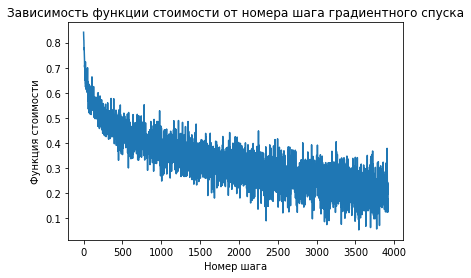

In [ ]:
# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions))

Точность (accuracy) на обучающей выборке: 0.57262
Точность (accuracy) на тестовой выборке: 0.5119
